# Final project Data for Python Analysis - MSD Year

## Alice PINAULT & Paul COIFFET

We are asked to predict the release year of a song from audio features. Songs are mostly western, commercial tracks ranging from 1922 to 2011, with a peak in the year 2000s.

# Import and collect data

We begin by importing all the libraries that we will need.

### Imports

In [153]:
import pandas as pd

#datavisualization
import matplotlib.pyplot as plt
import seaborn as sns

#Preprocessing
from sklearn import preprocessing
import numpy as np
from sklearn.preprocessing import StandardScaler

from sklearn.manifold import TSNE
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

Then, we import the data that has been collected by https://archive.ics.uci.edu/ml/datasets/YearPredictionMSD website. It has been given to us as a .txt file, and we store it as a pandas.DataFrame().

In [94]:
df = pd.read_csv("YearPredictionMSD.txt",header=None)
df

,0,1,2,3,4,5,6,7,8,9,...,81,82,83,84,85,86,87,88,89,90
0,2001,49.94357,21.47114,73.07750,8.74861,-17.40628,-13.09905,-25.01202,-12.23257,7.83089,...,13.01620,-54.40548,58.99367,15.37344,1.11144,-23.08793,68.40795,-1.82223,-27.46348,2.26327
1,2001,48.73215,18.42930,70.32679,12.94636,-10.32437,-24.83777,8.76630,-0.92019,18.76548,...,5.66812,-19.68073,33.04964,42.87836,-9.90378,-32.22788,70.49388,12.04941,58.43453,26.92061
2,2001,50.95714,31.85602,55.81851,13.41693,-6.57898,-18.54940,-3.27872,-2.35035,16.07017,...,3.03800,26.05866,-50.92779,10.93792,-0.07568,43.20130,-115.00698,-0.05859,39.67068,-0.66345
3,2001,48.24750,-1.89837,36.29772,2.58776,0.97170,-26.21683,5.05097,-10.34124,3.55005,...,34.57337,-171.70734,-16.96705,-46.67617,-12.51516,82.58061,-72.08993,9.90558,199.62971,18.85382
4,2001,50.97020,42.20998,67.09964,8.46791,-15.85279,-16.81409,-12.48207,-9.37636,12.63699,...,9.92661,-55.95724,64.92712,-17.72522,-1.49237,-7.50035,51.76631,7.88713,55.66926,28.74903
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515340,2006,51.28467,45.88068,22.19582,-5.53319,-3.61835,-16.36914,2.12652,5.18160,-8.66890,...,4.81440,-3.75991,-30.92584,26.33968,-5.03390,21.86037,-142.29410,3.42901,-41.14721,-15.46052
515341,2006,49.87870,37.93125,18.65987,-3.63581,-27.75665,-18.52988,7.76108,3.56109,-2.50351,...,32.38589,-32.75535,-61.05473,56.65182,15.29965,95.88193,-10.63242,12.96552,92.11633,10.88815
515342,2006,45.12852,12.65758,-38.72018,8.80882,-29.29985,-2.28706,-18.40424,-22.28726,-4.52429,...,-18.73598,-71.15954,-123.98443,121.26989,10.89629,34.62409,-248.61020,-6.07171,53.96319,-8.09364
515343,2006,44.16614,32.38368,-3.34971,-2.49165,-19.59278,-18.67098,8.78428,4.02039,-12.01230,...,67.16763,282.77624,-4.63677,144.00125,21.62652,-29.72432,71.47198,20.32240,14.83107,39.74909


### Data processing

We rename all the columns according to the dataset description :
90 attributes, 12 = timbre average, 78 = timbre covariance The first value is the year (target), ranging from 1922 to 2011. 

In [95]:
df.rename(columns={0: 'Year'}, inplace = True)

#Renames for TimbreAvg
for i in range(1,13):
    df.rename(columns={i:'TimbreAvg' + str(i)}, inplace = True)
#Renames for TimbreCov
for i in range(13,91):
    df.rename(columns={i:'TimbreCov' + str(i)}, inplace = True)

We check for NaN values and Null values:

In [96]:
df.isna().sum().any()
#No NaN values 
df.isnull().sum().any()
#No null values

False

There is no missing values.

We create a new column called decade that will be useful to us for visualizations but also later.

In [97]:
df['Decade'] = df['Year'].apply(lambda year : year-(year%10))

decade = df['Decade']
df.drop(labels=['Decade'], axis=1,inplace = True)
df.insert(1, 'Decade', decade)

In [98]:
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515345 entries, 0 to 515344
Data columns (total 92 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Year         515345 non-null  int64  
 1   Decade       515345 non-null  int64  
 2   TimbreAvg1   515345 non-null  float64
 3   TimbreAvg2   515345 non-null  float64
 4   TimbreAvg3   515345 non-null  float64
 5   TimbreAvg4   515345 non-null  float64
 6   TimbreAvg5   515345 non-null  float64
 7   TimbreAvg6   515345 non-null  float64
 8   TimbreAvg7   515345 non-null  float64
 9   TimbreAvg8   515345 non-null  float64
 10  TimbreAvg9   515345 non-null  float64
 11  TimbreAvg10  515345 non-null  float64
 12  TimbreAvg11  515345 non-null  float64
 13  TimbreAvg12  515345 non-null  float64
 14  TimbreCov13  515345 non-null  float64
 15  TimbreCov14  515345 non-null  float64
 16  TimbreCov15  515345 non-null  float64
 17  TimbreCov16  515345 non-null  float64
 18  TimbreCov17  515345 non-

Our data is complete and on the right format : we do not need to transform the data for now.

### Normalization

We normalize with the min/max method in order to weight equally all the features. We don't normalize the target 'Year' and 'Decade' that's why we start at the third column. 

In [99]:
df.iloc[:,2:] = (df.iloc[:,2:]-df.iloc[:,2:].min())/(df.iloc[:,2:].max() - df.iloc[:,2:].min())
df.iloc[:,2:].describe()

df.head()

,Year,Decade,TimbreAvg1,TimbreAvg2,TimbreAvg3,TimbreAvg4,TimbreAvg5,TimbreAvg6,TimbreAvg7,TimbreAvg8,...,TimbreCov81,TimbreCov82,TimbreCov83,TimbreCov84,TimbreCov85,TimbreCov86,TimbreCov87,TimbreCov88,TimbreCov89,TimbreCov90
0,2001,2000,0.800293,0.497205,0.599629,0.332545,0.370583,0.276962,0.452564,0.302498,...,0.352499,0.490087,0.372344,0.644339,0.569286,0.460524,0.613453,0.334855,0.500338,0.362200
1,2001,2000,0.780177,0.492987,0.595220,0.341113,0.386532,0.229635,0.546232,0.359274,...,0.346752,0.494001,0.367177,0.650031,0.550999,0.459186,0.613745,0.354687,0.506122,0.385477
2,2001,2000,0.817124,0.511606,0.571964,0.342073,0.394968,0.254988,0.512831,0.352096,...,0.344695,0.499157,0.350453,0.643421,0.567316,0.470228,0.587814,0.337376,0.504859,0.359438
3,2001,2000,0.772129,0.464800,0.540674,0.319971,0.411973,0.224074,0.535929,0.311991,...,0.369357,0.476865,0.357216,0.631499,0.546663,0.475993,0.593813,0.351622,0.515629,0.377862
4,2001,2000,0.817341,0.525963,0.590047,0.331972,0.374082,0.261984,0.487309,0.316833,...,0.350082,0.489912,0.373525,0.637490,0.564964,0.462806,0.611127,0.348736,0.505936,0.387203


### Data exploration

Now that we checked that our data is complete and on the right format, as well as normalized, we can explore it to better understand its features. 

We start by plotting the number of songs per year to have a first look on the repartition of the data.

<AxesSubplot:xlabel='Year', ylabel='Count'>

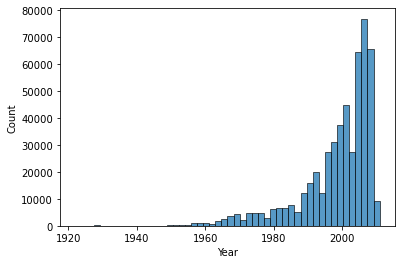

In [101]:
sns.histplot(data=df, x="Year", bins = 50)

We make the same plot with density. We observe that a majority of songs have been released in the 2000's. Before 1960, there are almost no songs released. We can delete every music before this date to have a better interpretation of the data.

In [102]:
df = df[df.Year>1960]
df

,Year,Decade,TimbreAvg1,TimbreAvg2,TimbreAvg3,TimbreAvg4,TimbreAvg5,TimbreAvg6,TimbreAvg7,TimbreAvg8,...,TimbreCov81,TimbreCov82,TimbreCov83,TimbreCov84,TimbreCov85,TimbreCov86,TimbreCov87,TimbreCov88,TimbreCov89,TimbreCov90
0,2001,2000,0.800293,0.497205,0.599629,0.332545,0.370583,0.276962,0.452564,0.302498,...,0.352499,0.490087,0.372344,0.644339,0.569286,0.460524,0.613453,0.334855,0.500338,0.362200
1,2001,2000,0.780177,0.492987,0.595220,0.341113,0.386532,0.229635,0.546232,0.359274,...,0.346752,0.494001,0.367177,0.650031,0.550999,0.459186,0.613745,0.354687,0.506122,0.385477
2,2001,2000,0.817124,0.511606,0.571964,0.342073,0.394968,0.254988,0.512831,0.352096,...,0.344695,0.499157,0.350453,0.643421,0.567316,0.470228,0.587814,0.337376,0.504859,0.359438
3,2001,2000,0.772129,0.464800,0.540674,0.319971,0.411973,0.224074,0.535929,0.311991,...,0.369357,0.476865,0.357216,0.631499,0.546663,0.475993,0.593813,0.351622,0.515629,0.377862
4,2001,2000,0.817341,0.525963,0.590047,0.331972,0.374082,0.261984,0.487309,0.316833,...,0.350082,0.489912,0.373525,0.637490,0.564964,0.462806,0.611127,0.348736,0.505936,0.387203
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515340,2006,2000,0.822563,0.531053,0.518069,0.303396,0.401635,0.263778,0.527820,0.389899,...,0.346084,0.495796,0.354436,0.646608,0.559084,0.467104,0.583999,0.342362,0.499417,0.345469
515341,2006,2000,0.799216,0.520030,0.512401,0.307268,0.347273,0.255066,0.543444,0.381766,...,0.367647,0.492528,0.348436,0.652881,0.592842,0.477940,0.602404,0.355996,0.508390,0.370342
515342,2006,2000,0.720337,0.484984,0.420425,0.332668,0.343797,0.320553,0.470887,0.252034,...,0.327667,0.488199,0.335904,0.666253,0.585531,0.468973,0.569137,0.328779,0.505821,0.352424
515343,2006,2000,0.704356,0.512337,0.477122,0.309604,0.365659,0.254497,0.546282,0.384071,...,0.394847,0.528093,0.359672,0.670957,0.603346,0.459553,0.613882,0.366514,0.503186,0.397587


We lost approximatly 4000 rows in our dataset but we now have a better interpretation. 

Here is our new plot of the number of songs per year

<AxesSubplot:xlabel='Year', ylabel='Density'>

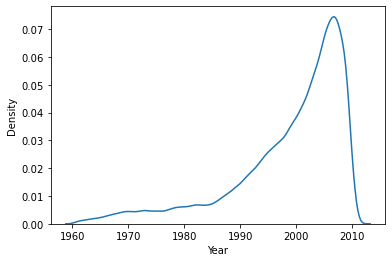

In [104]:
sns.kdeplot(data=df,x="Year")

We make the same plot but this time with decades :

Text(0.5, 1.0, 'Number of songs released per decade')

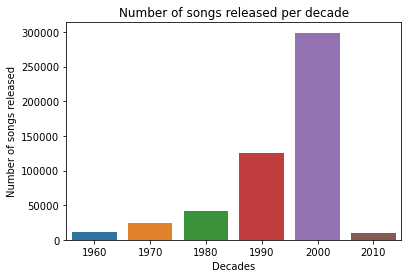

In [105]:
sns.countplot(x=df["Decade"],data=df)
plt.xlabel("Decades")
plt.ylabel("Number of songs released")
plt.title("Number of songs released per decade")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510987 entries, 0 to 515344
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   TimbreAvg1   510987 non-null  float64
 1   TimbreAvg2   510987 non-null  float64
 2   TimbreAvg3   510987 non-null  float64
 3   TimbreAvg4   510987 non-null  float64
 4   TimbreAvg5   510987 non-null  float64
 5   TimbreAvg6   510987 non-null  float64
 6   TimbreAvg7   510987 non-null  float64
 7   TimbreAvg8   510987 non-null  float64
 8   TimbreAvg9   510987 non-null  float64
 9   TimbreAvg10  510987 non-null  float64
 10  TimbreAvg11  510987 non-null  float64
 11  TimbreAvg12  510987 non-null  float64
dtypes: float64(12)
memory usage: 70.7 MB


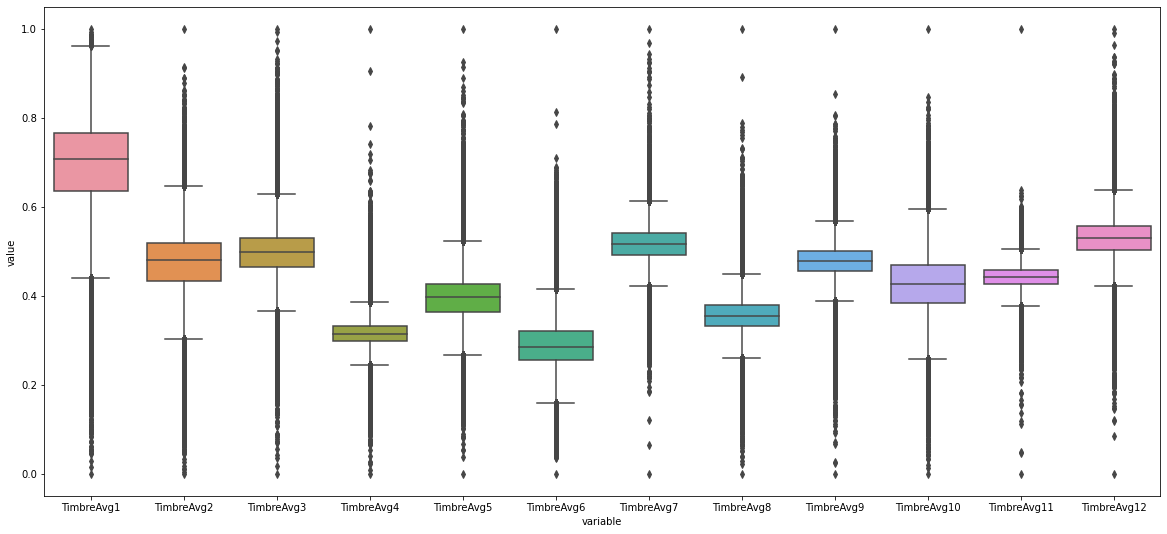

In [106]:
TimbresAvg = df[["TimbreAvg1", "TimbreAvg2", "TimbreAvg3", "TimbreAvg4","TimbreAvg5", "TimbreAvg6"
              ,"TimbreAvg7","TimbreAvg8","TimbreAvg9","TimbreAvg10","TimbreAvg11","TimbreAvg12"]]
TimbresAvg.info()

f, ax = plt.subplots(figsize=(20, 9))

ax=sns.boxplot(x="variable", y="value", data=pd.melt(TimbresAvg))

plt.show()

We now want to study the correlation matrix that show the correlation between each timbre.

### Correlation study

In [107]:
#Correlation matrix
corr=TimbresAvg.corr()

#Print the 2 highest correlation for each timbre 
for columns in corr.columns:
  print(corr[columns].nlargest(2))

TimbreAvg1    1.000000
TimbreAvg2    0.559079
Name: TimbreAvg1, dtype: float64
TimbreAvg2    1.000000
TimbreAvg1    0.559079
Name: TimbreAvg2, dtype: float64
TimbreAvg3    1.000000
TimbreAvg1    0.251593
Name: TimbreAvg3, dtype: float64
TimbreAvg4    1.00000
TimbreAvg6    0.32453
Name: TimbreAvg4, dtype: float64
TimbreAvg5    1.000000
TimbreAvg4    0.037685
Name: TimbreAvg5, dtype: float64
TimbreAvg6    1.00000
TimbreAvg4    0.32453
Name: TimbreAvg6, dtype: float64
TimbreAvg7    1.000000
TimbreAvg4    0.281503
Name: TimbreAvg7, dtype: float64
TimbreAvg8     1.00000
TimbreAvg10    0.41545
Name: TimbreAvg8, dtype: float64
TimbreAvg9     1.000000
TimbreAvg10    0.343337
Name: TimbreAvg9, dtype: float64
TimbreAvg10    1.00000
TimbreAvg8     0.41545
Name: TimbreAvg10, dtype: float64
TimbreAvg11    1.000000
TimbreAvg4     0.309496
Name: TimbreAvg11, dtype: float64
TimbreAvg12    1.000000
TimbreAvg11    0.206045
Name: TimbreAvg12, dtype: float64


<AxesSubplot:>

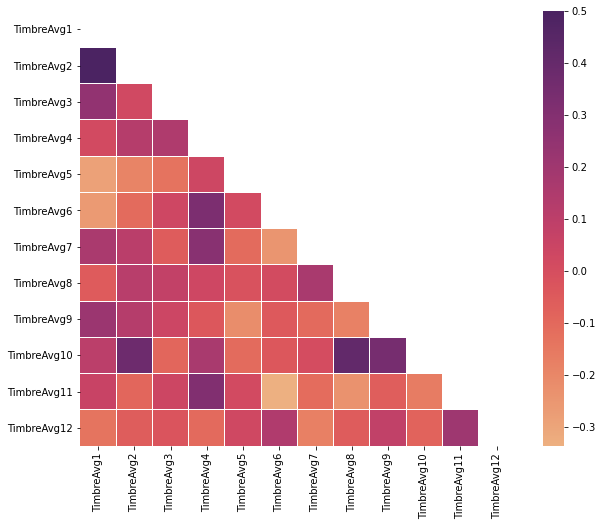

In [108]:
#Mask to hide doubled cells 
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

#Color for the heatmap 
cmap = "flare"

#Heatmap
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=0.5,
            square=True, linecolor = "white", linewidth = 0.1)

There is a correlation between the timbres but it's not a strong one. The maximum correlation is 0.56 between TimbreAvg2 and TimbreAvg1. 

We want to know the correlation between a timbre and a decade.

C:\Users\alice\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'TimbreAvg1'),
  Text(1, 0, 'TimbreAvg2'),
  Text(2, 0, 'TimbreAvg3'),
  Text(3, 0, 'TimbreAvg4'),
  Text(4, 0, 'TimbreAvg5'),
  Text(5, 0, 'TimbreAvg6'),
  Text(6, 0, 'TimbreAvg7'),
  Text(7, 0, 'TimbreAvg8'),
  Text(8, 0, 'TimbreAvg9'),
  Text(9, 0, 'TimbreAvg10'),
  Text(10, 0, 'TimbreAvg11'),
  Text(11, 0, 'TimbreAvg12')])

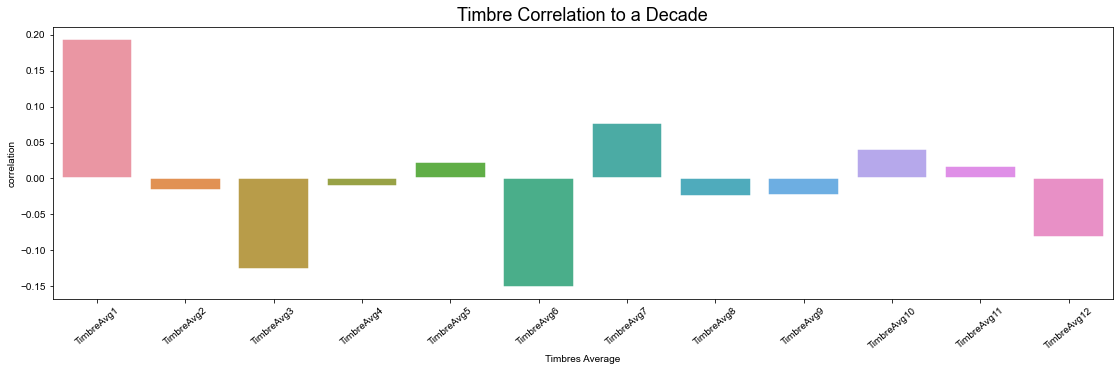

In [109]:
#Build an other corr matrix with Year and Decade Columns in it
corr2 = df.iloc[:,:14].corr()
#Barplot 
fig, ax = plt.subplots(figsize=(19,5))
sns.set_theme(style="white", context="talk")
sns.barplot(corr2['Decade'][2:14].index,corr2['Decade'][2:14].values)
plt.title("Timbre Correlation to a Decade")
plt.xlabel("Timbres Average")
plt.ylabel("correlation")
plt.xticks(rotation=40)

# Reduce parameters

### Data scaling

In order to prevent information about the distribution of the test set from leaking into our model, we need to adjust the scaler on our training data , and then standardize the training and test sets with this scaler.

In [110]:
#Dataframe without target (year and decade)
df_wotarget = df.iloc[:,2:]
df_wotarget

#Scaling
scalar = StandardScaler()
df_scaled = pd.DataFrame(scalar.fit_transform(df_wotarget), columns=df_wotarget.columns)
df_scaled

,TimbreAvg1,TimbreAvg2,TimbreAvg3,TimbreAvg4,TimbreAvg5,TimbreAvg6,TimbreAvg7,TimbreAvg8,TimbreAvg9,TimbreAvg10,...,TimbreCov81,TimbreCov82,TimbreCov83,TimbreCov84,TimbreCov85,TimbreCov86,TimbreCov87,TimbreCov88,TimbreCov89,TimbreCov90
0,1.076441,0.385725,1.837327,0.463509,-0.474374,-0.270232,-1.568690,-1.310207,0.390821,-0.665560,...,-0.082606,0.106001,0.148124,-0.237209,0.046401,-0.355821,0.545243,-0.471077,-0.257435,0.044234
1,0.876035,0.326425,1.759082,0.720919,-0.164047,-1.188985,0.761983,0.112411,1.429388,0.415944,...,-0.311893,0.303926,-0.064830,0.053189,-0.635777,-0.435730,0.557262,0.567602,0.209019,1.161626
2,1.244116,0.588175,1.346386,0.749775,0.000075,-0.696814,-0.069112,-0.067442,1.173388,-0.073789,...,-0.393962,0.564633,-0.754135,-0.284039,-0.027118,0.223733,-0.511546,-0.339019,0.107125,-0.088396
3,0.795859,-0.069857,0.791106,0.085719,0.330944,-1.296920,0.505629,-1.072358,-0.015773,-1.262263,...,0.590055,-0.562599,-0.475378,-0.892331,-0.797501,0.568019,-0.264269,0.407077,0.975756,0.796065
4,1.246277,0.790022,1.667284,0.446296,-0.406301,-0.560997,-0.704135,-0.951017,0.847304,-0.144117,...,-0.179013,0.097156,0.196827,-0.586666,-0.114854,-0.219542,0.449358,0.255939,0.194003,1.244484
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
510982,1.298299,0.861581,0.389969,-0.412266,0.129809,-0.526172,0.303845,0.879758,-1.176330,0.121831,...,-0.338532,0.394672,-0.589955,-0.121427,-0.334183,0.037154,-0.668768,-0.077875,-0.331742,-0.758952
510983,1.065709,0.706609,0.289387,-0.295917,-0.927925,-0.695287,0.692624,0.675967,-0.590741,0.049768,...,0.521798,0.229403,-0.837259,0.198609,0.925084,0.684310,0.089833,0.636199,0.391923,0.435086
510984,0.279886,0.213907,-1.342821,0.467201,-0.995548,0.575988,-1.112759,-2.574661,-0.782674,-2.043691,...,-1.073389,0.010506,-1.353799,0.880849,0.652382,0.148744,-1.281334,-0.789269,0.184738,-0.425108
510985,0.120679,0.598461,-0.336688,-0.225756,-0.570186,-0.706330,0.763224,0.733727,-1.493886,-0.400990,...,1.607113,2.027878,-0.374168,1.120847,1.316910,-0.413842,0.562897,1.187066,-0.027762,1.742971


## PCA

In [129]:
pca = PCA(n_components=20)
components = pca.fit_transform(df)
df_wo_pca = pd.DataFrame(pca.fit_transform(df_scaled))
df_wo_pca

total_var = pca.explained_variance_ratio_.sum() * 100
print(total_var)

60.647931138902145


Explained variance should not be less than 60%. If the variance explained is less than 60%, there are most likely chances of more factors showing up than the expected factors in a model.

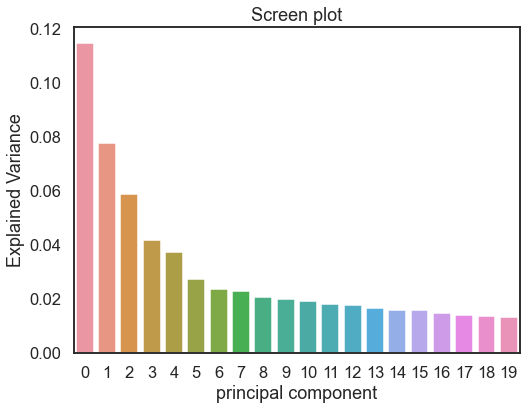

In [112]:
ind = np.arange(0, 20)
(fig, ax) = plt.subplots(figsize=(8, 6))
sns.barplot(x=ind, y=pca.explained_variance_ratio_)
ax.set_title('Screen plot')
ax.set_xticks(ind)
ax.set_xticklabels(ind)
ax.set_xlabel('principal component')
ax.set_ylabel('Explained Variance')
plt.show()

In [130]:
principal_components = []
target = df.iloc[:,0].values
samples, features = df_wo_pca.shape


for m in range(1, features+1):
    principal_components.append("Principal Component {}".format(m))
cols = principal_components+["Year"]   

df_pca = pd.DataFrame(np.append(df_wo_pca, target.reshape(samples,1), axis=1), columns=cols)
df_pca["Year"] = df_pca["Year"].astype(int)

print("df_pca.shape = ",df_pca.shape)

df_pca.shape =  (510987, 21)


In [131]:
df_pca

,Principal Component 1,Principal Component 2,Principal Component 3,Principal Component 4,Principal Component 5,Principal Component 6,Principal Component 7,Principal Component 8,Principal Component 9,Principal Component 10,...,Principal Component 12,Principal Component 13,Principal Component 14,Principal Component 15,Principal Component 16,Principal Component 17,Principal Component 18,Principal Component 19,Principal Component 20,Year
0,-3.240181,-0.586680,0.813064,0.065863,-0.466466,-0.381172,-0.507582,0.532935,-0.859327,1.176875,...,0.898120,0.221661,-0.195949,-0.471858,0.057501,0.413364,0.949856,0.226423,0.317259,2001
1,-2.766758,0.943376,-0.116635,0.981217,0.048441,-0.055970,-0.780577,0.439254,0.627333,-0.945349,...,1.265460,-0.335347,-0.779498,-1.410994,0.315364,-0.352331,0.115181,0.205922,0.748464,2001
2,-2.983067,-1.601376,0.546566,0.827330,-0.696948,-0.750058,0.469225,0.257935,-0.740765,0.530773,...,0.279455,0.685770,0.774628,-0.490250,0.307881,0.000207,0.636751,0.012217,0.640402,2001
3,-3.294988,0.299686,-1.155877,0.420749,-1.378261,0.553767,0.161696,-0.210373,0.326290,0.883419,...,0.483067,0.239936,-1.352831,0.018740,0.316849,-1.558180,0.058009,0.010091,-0.438879,2001
4,-3.593748,-0.065908,0.099425,0.812653,-1.383061,-0.036357,-0.596716,-0.116789,0.731022,0.135463,...,0.939693,-0.306671,-0.643851,-0.730376,-0.850406,0.335145,0.330920,-0.178257,0.403701,2001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
510982,-2.717545,-1.478629,1.964066,0.836372,-0.013152,1.018487,0.490708,-0.379781,0.188901,0.434278,...,-0.251137,0.200386,-0.649396,0.598120,-0.062009,-0.341505,0.580646,-0.118668,-0.087874,2006
510983,-2.459390,-0.972301,1.505880,-0.055467,-0.603887,0.031536,0.059631,1.003746,0.783445,-1.150000,...,-0.821166,0.756708,0.198723,-0.096875,0.395742,-0.577173,0.232656,-0.058342,-0.503713,2006
510984,1.140472,-3.274163,-2.246221,-4.583567,-0.373233,-1.950006,-0.182029,-2.615767,0.863060,1.160945,...,-1.057908,1.362368,0.107076,-0.673634,0.721904,0.242707,0.076570,1.547989,1.861209,2006
510985,0.080269,-0.065851,0.275906,-0.262499,-2.618818,-0.024813,-0.932348,0.251132,3.269095,-0.513809,...,-2.504506,1.102045,-1.798722,0.738251,-1.964974,-0.262356,-1.829250,0.855753,-1.279836,2006


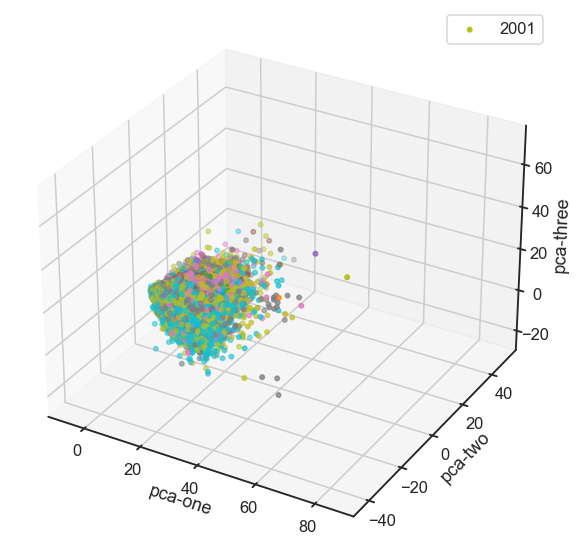

In [27]:
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=df_pca.loc[:,:]['Principal Component 1'], 
    ys=df_pca.loc[:,:]['Principal Component 2'], 
    zs=df_pca.loc[:,:]['Principal Component 3'], 
    c=df_pca.loc[:,:]["Year"], 
    cmap='tab10',
)
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.legend(df_pca["Year"])
plt.show()

In [132]:
df_pca['Decade'] = df_pca['Year'].apply(lambda year : year-(year%10))

decade = df_pca['Decade']
df_pca.drop(labels=['Decade'], axis=1,inplace = True)
df_pca.insert(21, 'Decade', decade)

df_pca.sample()

,Principal Component 1,Principal Component 2,Principal Component 3,Principal Component 4,Principal Component 5,Principal Component 6,Principal Component 7,Principal Component 8,Principal Component 9,Principal Component 10,...,Principal Component 13,Principal Component 14,Principal Component 15,Principal Component 16,Principal Component 17,Principal Component 18,Principal Component 19,Principal Component 20,Year,Decade
336058,-3.339414,0.125367,0.480247,-0.290831,-0.590724,-0.57496,0.700812,0.502501,0.461936,0.249367,...,-0.008922,-0.07105,-0.378446,0.456603,0.64259,-0.696948,0.20006,0.609589,2007,2000


## t-SNE

In [70]:
tsne_samples = df_pca.shape[0]
tsne = TSNE(n_components=2, verbose=2, perplexity=50, n_iter=250)

In [71]:
tsne = tsne.fit_transform(df_pca.iloc[:tsne_samples,:1])

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 510987 samples in 2.759s...
[t-SNE] Computed neighbors for 510987 samples in 166.973s...
[t-SNE] Computed conditional probabilities for sample 1000 / 510987
[t-SNE] Computed conditional probabilities for sample 2000 / 510987
[t-SNE] Computed conditional probabilities for sample 3000 / 510987
[t-SNE] Computed conditional probabilities for sample 4000 / 510987
[t-SNE] Computed conditional probabilities for sample 5000 / 510987
[t-SNE] Computed conditional probabilities for sample 6000 / 510987
[t-SNE] Computed conditional probabilities for sample 7000 / 510987
[t-SNE] Computed conditional probabilities for sample 8000 / 510987
[t-SNE] Computed conditional probabilities for sample 9000 / 510987
[t-SNE] Computed conditional probabilities for sample 10000 / 510987
[t-SNE] Computed conditional probabilities for sample 11000 / 510987
[t-SNE] Computed conditional probabilities for sample 12000 / 510987
[t-SNE] Computed conditional prob

C:\Users\alice\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


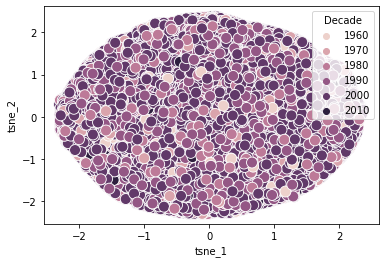

In [92]:
df_tsne = pd.DataFrame({'tsne_1': tsne[:,0], 'tsne_2': tsne[:,1], 'Decade': df_tsne['Decade']})
fig, ax = plt.subplots(1)
sns.scatterplot(x='tsne_1', y='tsne_2', hue='Decade', data=df_tsne, ax=ax,s=120)
lim = (tsne.min()-5, tsne.max()+5)

# Models predicting Years

In [171]:
df_train, df_test = train_test_split(df_pca, test_size=0.1)

In [172]:
# Test set
x_test = df_test.iloc[:,:-2]
y_test = df_test.iloc[:,-2]

x_train = df_train.iloc[:,:-2]
y_train = df_train.iloc[:,-2]

y_test = y_test[:2000]
x_test = x_test[:2000]

In [173]:
StandardScaler().fit(x_train) #We only fit training data 
X_train = StandardScaler().fit_transform(x_train)
X_test = StandardScaler().fit_transform(x_test)

### Neural networks

In [53]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(13,13,13),max_iter=500)

mlp.fit(X_train,y_train)

MLPClassifier(hidden_layer_sizes=(13, 13, 13), max_iter=500)

In [54]:
predictions = mlp.predict(X_test)

In [55]:
mlp.score(X_test, y_test)

0.07775298340933347

As we see, predicting Years does not give us satisfying results, we will therefore predict Decades with our other models.

# Models predicting Decades 

In [148]:
# Train and Test sets
x_train, x_test, y_train, y_test = train_test_split(df_pca.iloc[:,:-2], df_pca['Decade'], test_size=0.98)
y_test = y_test[:2000]
x_test = x_test[:2000]
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)
y_train


(10219, 20)
(2000, 20)
(10219,)
(2000,)


498447    2000
221479    2000
320221    1990
5603      2000
262705    2000
          ... 
315152    1990
128429    1990
343425    2000
273910    2000
248210    1970
Name: Decade, Length: 10219, dtype: int64

In [149]:
StandardScaler().fit(x_train) #We only fit training data 
X_train = StandardScaler().fit_transform(x_train)
X_test = StandardScaler().fit_transform(x_test)

## Neural networks

In [79]:
mlp = MLPClassifier(hidden_layer_sizes=(13,13,13),max_iter=500)

mlp.fit(X_train,y_train)

MLPClassifier(hidden_layer_sizes=(13, 13, 13), max_iter=500)

In [80]:
predictions = mlp.predict(X_test)

In [81]:
mlp.score(X_test, y_test)

0.58138

In [82]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

        1960       0.50      0.00      0.00      1082
        1970       0.13      0.01      0.02      2389
        1980       0.29      0.08      0.12      4018
        1990       0.37      0.24      0.29     12512
        2000       0.63      0.89      0.74     29086
        2010       0.00      0.00      0.00       913

    accuracy                           0.58     50000
   macro avg       0.32      0.20      0.20     50000
weighted avg       0.50      0.58      0.51     50000



## Random Forest

In [83]:
depths = [5,10,15,20]
estimators=[100]

for d in depths:
  for n in estimators:
    model = RandomForestClassifier(n_estimators=n, max_depth=d, random_state=0).fit(X_train,y_train) 
    pred_y = model.predict(X_test)
    score = model.score(X_test, y_test)
    print("n_estimators:{0:.0f}, Depth:{1:.0f}, Score:{2:.3f}"
        .format(n, d, score))

n_estimators:100, Depth:5, Score:0.582
n_estimators:100, Depth:10, Score:0.585
n_estimators:100, Depth:15, Score:0.587
n_estimators:100, Depth:20, Score:0.587


## KNN

In [150]:
grid_param = {
    'n_neighbors': [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20],
    'weights':['uniform', 'distance'],
    'metric':['euclidean', 'manhattan']
}

gs = GridSearchCV(KNeighborsClassifier(),
grid_param, verbose=1,cv=3, n_jobs = -1)

gs_results = gs.fit(X_train, y_train)

Fitting 3 folds for each of 76 candidates, totalling 228 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   22.2s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 228 out of 228 | elapsed:  1.6min finished


In [151]:
gs_results.best_estimator_

KNeighborsClassifier(metric='euclidean', n_neighbors=19, weights='distance')

In [157]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets, svm, metrics
kNN = KNeighborsClassifier(20)
kNN.fit(X_train,y_train)
y_prediction_kNN = model.predict(X_test)

kNN_accuracy = metrics.accuracy_score(y_test, y_prediction_kNN)
print(kNN_accuracy)

print(model.get_params(deep=True))

0.598
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 20, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 0, 'verbose': 0, 'warm_start': False}


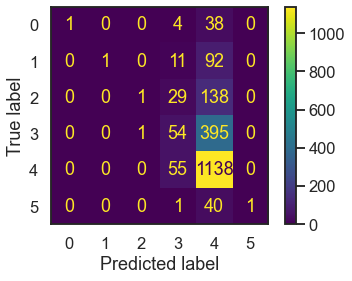

In [158]:
cm_kNN = confusion_matrix(y_test, y_prediction_kNN)
disp = ConfusionMatrixDisplay(cm_kNN)
disp.plot()
plt.show()

## SVC

In [159]:
from sklearn.model_selection import GridSearchCV
param = {
    'C'      : [5,7.5,10,12.5],
    'gamma'  : [4,5,6]     
}
gs = GridSearchCV(svm.SVC(),
param, verbose=1,cv=3, n_jobs = -1)
gs_results = gs.fit(X_train, y_train)

print(gs_results)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:  1.8min finished


GridSearchCV(cv=3, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [5, 7.5, 10, 12.5], 'gamma': [4, 5, 6]},
             verbose=1)


In [160]:
gs_results.best_params_

{'C': 5, 'gamma': 4}

We build the model according to the best parameters : C=5 gamma=4

In [161]:
from sklearn import svm
svr = svm.SVR(kernel='linear')

from sklearn.model_selection import  cross_val_score
#cross_val_score(svr, X_train, y_train)

#SVC
clf = svm.SVC(kernel='rbf',C=5,gamma=4);
clf.fit(X_train, y_train)

SVC(C=5, gamma=4)

We retrieve the predictions

In [167]:
from sklearn import datasets, svm, metrics
from sklearn.metrics import confusion_matrix

y_expected = y_test
y_predicted_SCV = clf.predict(X_test)

print("Classification  %s:\n%s\n"
      % (clf, metrics.classification_report(y_expected, y_predicted_SCV)))
cnf_matrix = metrics.confusion_matrix(y_expected, y_predicted_SCV)

Classification  SVC(C=5, gamma=4):
              precision    recall  f1-score   support

        1960       0.00      0.00      0.00        43
        1970       0.00      0.00      0.00       104
        1980       0.00      0.00      0.00       168
        1990       0.00      0.00      0.00       450
        2000       0.60      1.00      0.75      1193
        2010       0.00      0.00      0.00        42

    accuracy                           0.60      2000
   macro avg       0.10      0.17      0.12      2000
weighted avg       0.36      0.60      0.45      2000




C:\Users\alice\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


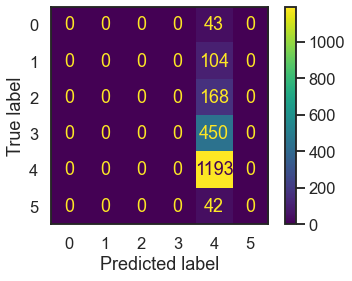

In [168]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm_SVC = confusion_matrix(y_expected, y_predicted_SCV)
disp = ConfusionMatrixDisplay(cm_SVC)
disp.plot()
plt.show()

In [169]:
print("Score : ", clf.score(X_test, y_test))

Score :  0.5965


### Our best model is our KNN !